In [218]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [219]:
# Read the data
df = pd.read_csv('Q1_data.csv')
data_arr = df[['market_cap', 'volume']].to_numpy()


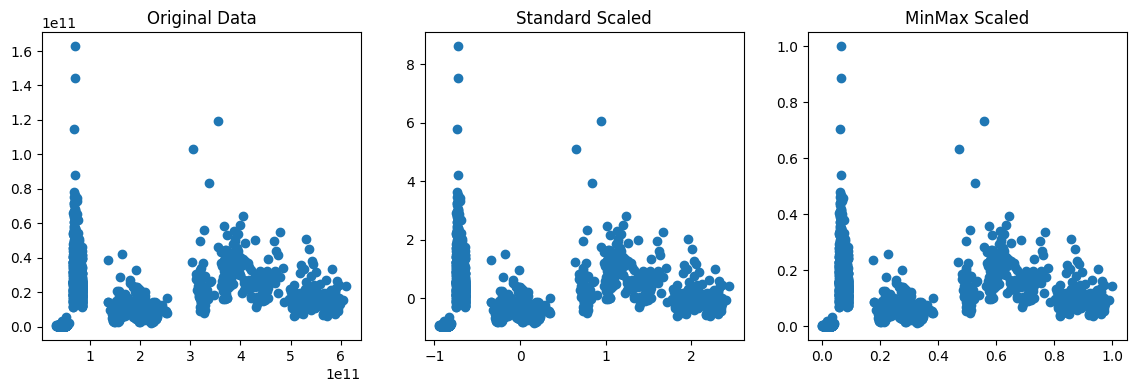

In [220]:
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
data_arr_std_scaled = std_scaler.fit_transform(data_arr)

minmax_scaler = MinMaxScaler()
data_arr_minmax = minmax_scaler.fit_transform(data_arr)

fig, ax = plt.subplots(1, 3, figsize=(14, 4))

ax[0].set_title('Original Data'), ax[1].set_title('Standard Scaled'), ax[2].set_title('MinMax Scaled')

ax[0].scatter(data_arr[:, 0], data_arr[:, 1])
ax[1].scatter(data_arr_std_scaled[:, 0], data_arr_std_scaled[:, 1])
ax[2].scatter(data_arr_minmax[:, 0], data_arr_minmax[:, 1]);

#### We see that the original data does not require scaling  
#### Now let's fit the data with 5 clusters

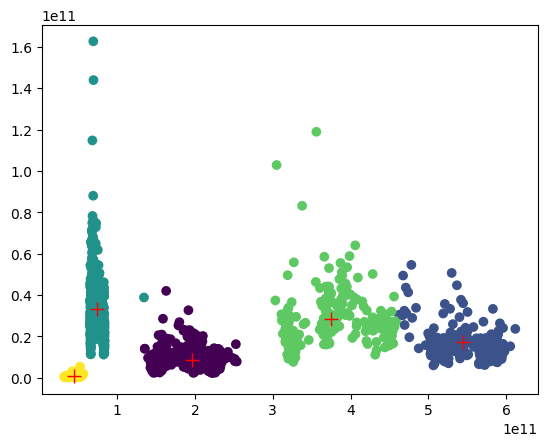

In [221]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=5, n_init=10)
cluster.fit(data_arr)

plt.scatter(data_arr[:, 0], data_arr[:, 1], c=cluster.labels_)
for x, y in cluster.cluster_centers_:
    plt.plot(x, y, marker='+', markersize=10, color='r')

### Let's evaluate different n_clusters

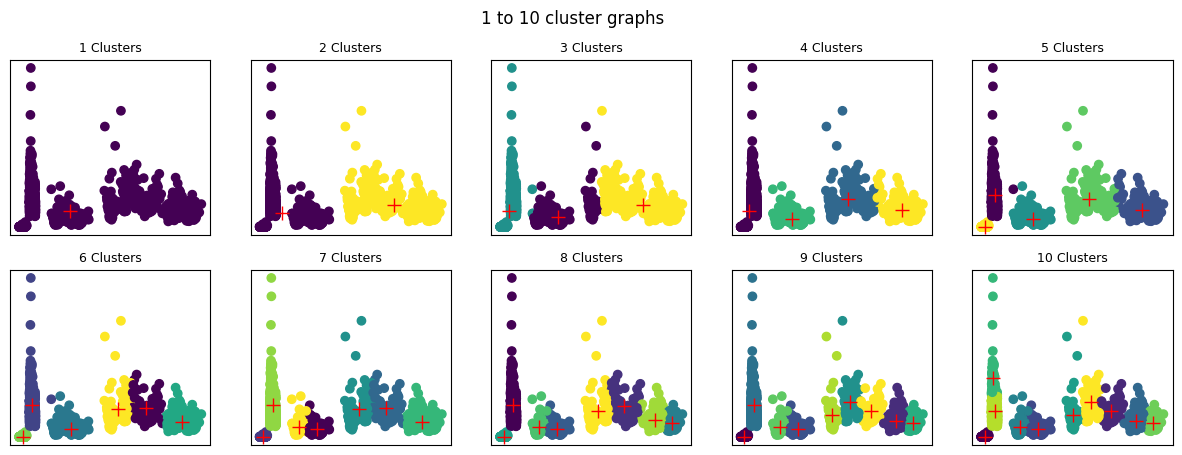

In [222]:
from sklearn.metrics import silhouette_score

inertia_list, silhouette_list = [], [np.nan]

fig2, ax2 = plt.subplots(2, 5, figsize=(15, 5))
fig2.suptitle('1 to 10 cluster graphs')
ax2 = ax2.flatten()

for cluster_count in range(1, 11):
    cluster = KMeans(n_clusters=cluster_count, n_init=10)
    cluster.fit(data_arr)
    
    current_axis = ax2[cluster_count -1]
    current_axis.scatter(x=data_arr[:, 0], y=data_arr[:, 1], c=cluster.labels_)
    current_axis.set_title(f'{cluster_count} Clusters', size=9)
    current_axis.get_xaxis().set_visible(False), current_axis.get_yaxis().set_visible(False)
    
    for x, y in cluster.cluster_centers_:
        current_axis.plot(x, y, marker='+', markersize=10, color='r')

    if cluster_count > 1:
        silhouette_list.append(silhouette_score(data_arr, labels=cluster.labels_))
    inertia_list.append(cluster.inertia_)
    
metric_df = pd.DataFrame(zip(inertia_list, silhouette_list), index=range(1, 11), columns=['Inertia', 'Silhouette'])

## Draw metrics graph

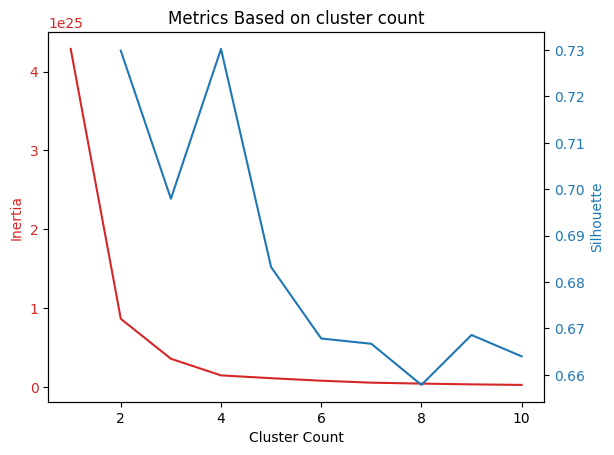

In [223]:
fig3, ax3 = plt.subplots()
ax3.set_title('Metrics Based on cluster count')
color = 'tab:red'
ax3.set_xlabel('Cluster Count')
ax3.set_ylabel('Inertia', color=color)
ax3.plot(metric_df.index, metric_df['Inertia'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax3_twin = ax3.twinx()

color = 'tab:blue'
ax3_twin.set_ylabel('Silhouette', color=color)
ax3_twin.plot(metric_df.index, metric_df['Silhouette'], color=color)
ax3_twin.tick_params(axis='y', labelcolor=color)

**As you can see from the graph above, at 4 clusters Inertia starts to level off and Silhouette score is also high so we can conclude that 4 clusters is the sweet spot**

number of clusters: 4
number of noise points: 4


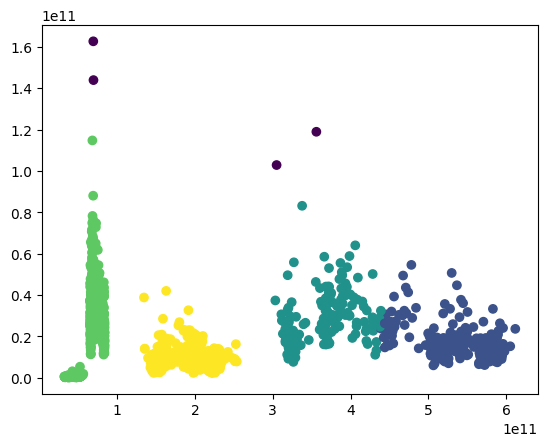

In [217]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=50_000_000_000, min_samples=100)
db.fit(data_arr)

n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_noise_ = list(db.labels_).count(-1)
print(f"number of clusters: {n_clusters_}")
print(f"number of noise points: {n_noise_}")

plt.scatter(data_arr[:, 0], data_arr[:, 1], c=db.labels_);